## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set_theme()

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

import warnings
warnings.filterwarnings('ignore')

#### `1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

##### a. Read in the dataset and take a look at the top few rows here:

In [2]:
data = pd.read_csv('ab_data.csv')
df = data.copy()
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


##### b. Use the below cell to find the number of rows in the dataset.

In [3]:
len(df)

294478

##### c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

##### d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

##### e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
len(df[(df['landing_page']=='new_page') != (df['group']=='treatment')])

3893

In [7]:
df[(df['landing_page']=='new_page') != (df['group']=='treatment')]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
...,...,...,...,...,...
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294252,892498,2017-01-22 01:11:10.463211,treatment,old_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


##### f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

#### `2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

##### a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df.query('(group=="treatment" and landing_page=="new_page") or (group=="control" and landing_page=="old_page")')
# or df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))]

In [11]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
df2.shape[0]

290585

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

#### `3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

##### a. How many unique **user_id**s are in **df2**?

In [14]:
df2['user_id'].nunique()

290584

##### b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

##### c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


##### d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.drop_duplicates(subset=['user_id'], inplace=True)

In [18]:
df2['user_id'].duplicated().sum()

0

In [19]:
df2.shape[0]

290584

#### `4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

In [20]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


#### Converted Values Count

In [21]:
df2['converted'].value_counts()

0    255831
1     34753
Name: converted, dtype: int64

#### Groups Values Count


In [22]:
df2['group'].value_counts()

treatment    145310
control      145274
Name: group, dtype: int64

#### Converted | Control

In [23]:
df2[(df2['group']=='control')]['converted'].value_counts()

0    127785
1     17489
Name: converted, dtype: int64

#### Converted | Treatment

In [24]:
df2[(df2['group']=='treatment')]['converted'].value_counts()

0    128046
1     17264
Name: converted, dtype: int64

#### Landing Pages Values Count

In [25]:
df2['landing_page'].value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

#### Converted | Old Page

In [26]:
df2[(df2['landing_page']=='old_page')]['converted'].value_counts()

0    127785
1     17489
Name: converted, dtype: int64

#### Converted | New Page

In [27]:
df2[(df2['landing_page']=='new_page')]['converted'].value_counts()

0    128046
1     17264
Name: converted, dtype: int64

### Conditional Probability

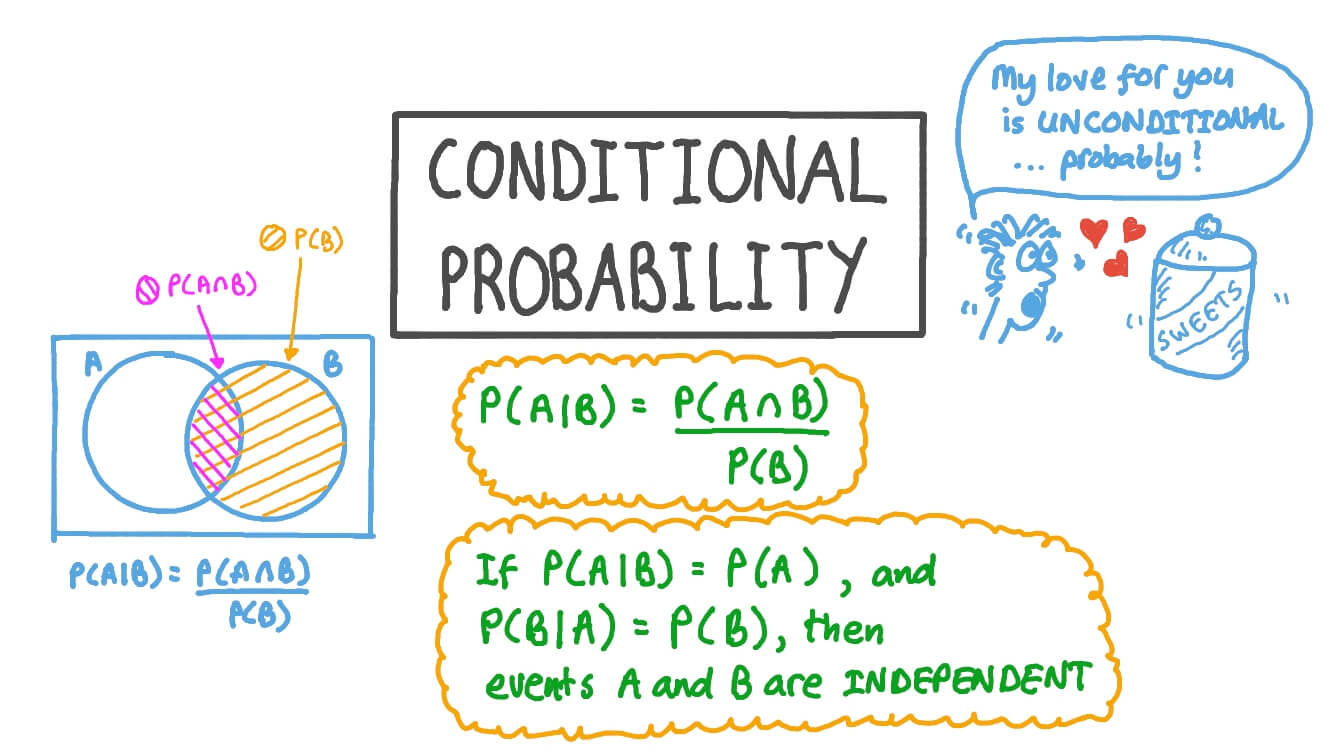

##### a. What is the probability of an individual converting regardless of the page they receive?

In [28]:
probability_of_converting = df2[df2['converted']==1]['converted'].value_counts()[1]/len(df2)
probability_of_converting

0.11959708724499628

##### b. Given that an individual was in the `control` group, what is the probability they converted?

#### Probability of converted of an individual in control group
$$
    P(A|B) = \frac{P(Converted * Control)}{P(Control)}
$$

In [29]:
probability_converted_control = df2[(df2['group']=='control') == (df2['converted']==1)]['converted'].value_counts()[1]/df2[df2['group']=='control']['converted'].count()
probability_converted_control

0.1203863045004612

##### c. Given that an individual was in the `treatment` group, what is the probability they converted?

#### Probability of converted of an individual in Treatment group
$$
    P(A|B) = \frac{P(Converted * Treatment)}{P(Treatment)}
$$

In [30]:
probability_converted_treatment = df2[(df2['group']=='treatment') == (df2['converted']==1)]['converted'].value_counts()[1]/df2[df2['group']=='treatment']['converted'].count()
probability_converted_treatment

0.11880806551510564

##### d. What is the probability that an individual received the new page?

In [31]:
probability_new_page = df2[df2['landing_page']=='new_page']['landing_page'].value_counts()[0]/len(df2)
probability_new_page

0.5000619442226688

##### e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**<span style="color:green">1. a ==> 0.1196</span>**

**<span style="color:green">2. b ==> 0.1204</span>**

**<span style="color:green">3. c ==> 0.1188</span>**

**<span style="color:green">4. d ==> 0.50006</span>**


In [32]:
probability_converted_treatment - probability_converted_control

-0.0015782389853555567

**<span style="color:green">There is no sufficient evidence to conclude that the population prportion of the new treatment page leads to more conversions.</span>**

___________________________

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


#### `1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**<span style="color:green">$$H_o: P_{new} <= P_{old}$$
$$H_1: P_{new} > P_{old}$$</span>**

**<span style="color:green">Null: The convesion rate to the old_page is equal or higher than the new_page.</span>**

    
**<span style="color:green">Alternative: The convesion rate to the old_page is lower than the new_page.</span>**

#### `2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

##### a. What is the **convert rate** for $p_{new}$ under the null? 

In [33]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

##### b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [34]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

##### c. What is $n_{new}$?

In [35]:
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").shape[0] 
convert_new

17264

In [36]:
n_new = df2[df2['group'] == 'treatment'].shape[0]
n_new

145310

##### d. What is $n_{old}$?

In [37]:
convert_old = df2.query(" landing_page == 'old_page' and converted == 1").shape[0] 
convert_old

17489

In [38]:
n_old = df2[df2['group'] == 'control'].shape[0] 
n_old

145274

##### e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [39]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new

##### f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [40]:
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old 

##### g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [41]:
new_converted_simulation.mean() - old_converted_simulation.mean()

7.65754154341547e-06

##### h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [42]:
p_diffs = [] 
p_diffs = new_converted_simulation - old_converted_simulation
lower_bound, upper_bound = np.percentile(p_diffs, 0.5), np.percentile(p_diffs, 99.5)

##### i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Lower Bound =  -0.003154450577695542 
Upper Bound =  0.0032532836061982154 
Mean =  7.657541543425825e-06


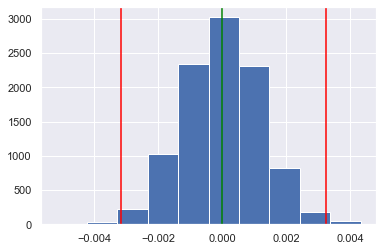

In [43]:
plt.hist(p_diffs);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=np.mean(p_diffs), color = 'green'); # where our sample mean falls on null dist
print('Lower Bound = ',lower_bound,'\nUpper Bound = ',upper_bound,'\nMean = ', np.mean(p_diffs))

##### j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [44]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

In [45]:
#  Actual observed differences in conversion, infered from ab_data.csv 
actual_difference = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean() 
p_diffs = np.array(p_diffs) 
print('Actual observed difference: ',actual_difference ,'\nP_value: ',(actual_difference < p_diffs).mean())

Actual observed difference:  -0.0015782389853555567 
P_value:  0.9035


##### k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**<span style="color:green">It is called the p-value in scientific studies, and it is a measure of the probability that an observed difference could have occurred just by random chance. The lower the p-value, the greater the statistical significance of the observed difference. Here it shows that it is not statistically significant that there are more conversions to the new page from the treatment group than the control group.</span>**

##### m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html?highlight=ztest#statsmodels.stats.proportion.proportions_ztest) is a helpful link on using the built in.

<b>Parameters:	</b>
- <b>count:</b> (integer or array_like) 
    
    
     – the number of successes in nobs trials. If this is array_like, then the assumption is that this represents the number of successes for each independent sample.


- <b>nobs:</b> (integer or array-like) 
    
    
     – the number of trials or observations, with the same length as count.


- <b>value:</b> (float, array_like or None, optional) 
    
    
    – This is the value of the null hypothesis equal to the proportion in the case of a one sample test. In the case of a two-sample test, the null hypothesis is that prop[0] - prop[1] = value, where prop is the proportion in the two samples. If not provided value = 0 and the null is prop[0] = prop[1]


- <b>alternative:</b> (string in ['two-sided', 'smaller', 'larger']) 
    
    
    – The alternative hypothesis can be either two-sided or one of the one- sided tests, smaller means that the alternative hypothesis is prop < value and larger means prop > value. In the two sample test, smaller means that the alternative hypothesis is p1 < p2 and larger means p1 > p2 where p1 is the proportion of the first sample and p2 of the second one.


- <b>prop_var:</b> (False or float in (0, 1)) 
    
    
    – If prop_var is false, then the variance of the proportion estimate is calculated based on the sample proportion. Alternatively, a proportion can be specified to calculate this variance. Common use case is to use the proportion under the Null hypothesis to specify the variance of the proportion estimate.


<b>Returns:</b>
- <b>zstat</b> (float) 
    
    
    – test statistic for the z-test
    
- <b>p-value</b> (float) 
    
    
    – p-value for the z-test

**<span style="color:green">$$H_o: P_{new} <= P_{old}$$
$$H_1: P_{new} > P_{old}$$</span>**

##### l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [46]:
# stats.proportions_ztest
from statsmodels.stats.proportion import proportions_ztest

In [47]:
convert_old = df2.query(" landing_page == 'old_page' and converted == 1").shape[0] 
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").shape[0] 
n_old = df2[df2['group'] == 'control'].shape[0] 
n_new = df2[df2['group'] == 'treatment'].shape[0] 

##### m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html?highlight=ztest#statsmodels.stats.proportion.proportions_ztest) is a helpful link on using the built in.

<b>Parameters:	</b>
- <b>count:</b> (integer or array_like) 
    
    
     – the number of successes in nobs trials. If this is array_like, then the assumption is that this represents the number of successes for each independent sample.


- <b>nobs:</b> (integer or array-like) 
    
    
     – the number of trials or observations, with the same length as count.


- <b>value:</b> (float, array_like or None, optional) 
    
    
    – This is the value of the null hypothesis equal to the proportion in the case of a one sample test. In the case of a two-sample test, the null hypothesis is that prop[0] - prop[1] = value, where prop is the proportion in the two samples. If not provided value = 0 and the null is prop[0] = prop[1]


- <b>alternative:</b> (string in ['two-sided', 'smaller', 'larger']) 
    
    
    – The alternative hypothesis can be either two-sided or one of the one- sided tests, smaller means that the alternative hypothesis is prop < value and larger means prop > value. In the two sample test, smaller means that the alternative hypothesis is p1 < p2 and larger means p1 > p2 where p1 is the proportion of the first sample and p2 of the second one.


- <b>prop_var:</b> (False or float in (0, 1)) 
    
    
    – If prop_var is false, then the variance of the proportion estimate is calculated based on the sample proportion. Alternatively, a proportion can be specified to calculate this variance. Common use case is to use the proportion under the Null hypothesis to specify the variance of the proportion estimate.


<b>Returns:</b>
- <b>zstat</b> (float) 
    
    
    – test statistic for the z-test
    
- <b>p-value</b> (float) 
    
    
    – p-value for the z-test

**<span style="color:green">$$H_o: P_{new} <= P_{old}$$
$$H_1: P_{new} > P_{old}$$</span>**

In [48]:
count = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])
stat, pval = proportions_ztest(count, nobs, alternative='larger')
print('Z_score: ',stat,'\nP_value: {0:0.3f}'.format(pval))

Z_score:  -1.3109241984234394 
P_value: 0.905


##### n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- **<span style="color:green">z-score or also called a standard score, gives an idea of how far from the mean a data point is. It means how many standard deviations below or above the population mean a raw score is. Which means that the row score is away from the population mean by 1.31 standard deviations.</span>**


- **<span style="color:green">But the p_value shows that it is not statistically significant that there are more conversions to the new page from the treatment group than the control group.</span>**


- **<span style="color:green">Yes, they do</span>**

________________________

<a id='regression'></a>
### Part III - A regression approach

#### `1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

##### a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**<span style="color:green">Logistic Regression (Classification)</span>**

##### b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [49]:
model_df = df2.copy()

#### Adding Intercept

In [50]:
model_df['Intercept'] = 1

#### Adding Group Column Dummies

In [51]:
model_df[['ab_page']]= pd.get_dummies(df2['group'])['treatment']

In [52]:
model_df.head()

,user_id,timestamp,group,landing_page,converted,ab_page,Intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


##### c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [53]:
import statsmodels.api as sm

In [54]:
classification_model = sm.Logit(model_df['converted'], model_df[['Intercept','ab_page']])

result = classification_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


##### d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 02 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        10:41:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

##### e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- **<span style="color:green">P_value: 0.1899</span>**


**<span style="color:green">$$H_o: P_{new} = P_{old}$$
$$H_1: P_{new} \neq P_{old}$$</span>**


- **<span style="color:green">Here it is a two-sided t-test compared to a one-sided t-test in part II, that is why the p_value differs from the above one in part II.</span>**

In [56]:
count = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])
stat, pval = proportions_ztest(count, nobs, alternative='two-sided')
print('Z_score: ',stat,'\nP_value: {0:0.3f}'.format(pval))

Z_score:  -1.3109241984234394 
P_value: 0.190


- **<span style="color:green">When using the built in function it nearly gives the same result of the P_value: 0.190</span>**

##### f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<span style="color:green">Adding new factors or features to our machine learning model may enhance its classifying results, for example, we can avoid <b>underfitting</b>, it occurs when a model is too simple, which informed by too few features or regularized too much, which makes it inflexible in learning from the dataset.</span>

<span style="color:green">But adding more features also can be improper. More features may increase the <b>noise</b> in the data, or the <b>complexity</b> of the model increases and thus <b>turns from a linear model to a complex model with higher degrees</b>. Another effect can happen is called <b>multicollinearity</b>, it emerges when three or more variables, which are highly correlated, are included within a model. It increases the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model that leads to the coefficient estimates are unstable and difficult to interpret.</span>

========================================================================================================================

##### g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [57]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [58]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page
user_id,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1


In [59]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

#### Making new Model Dataframe

In [60]:
model_df2 = countries_df.set_index('user_id').join(model_df.set_index('user_id'), how='inner')

In [61]:
model_df2.head()

,country,timestamp,group,landing_page,converted,ab_page,Intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


#### Creating the necessary dummy variables

In [62]:
model_df2[['UK','US']] = pd.get_dummies(model_df2['country'])[['UK', 'US']]

In [63]:
model_df2['ab_UK'] = model_df2['ab_page'] * model_df2['UK']
model_df2['ab_US'] = model_df2['ab_page'] * model_df2['US']

In [64]:
model_df2.head()

,country,timestamp,group,landing_page,converted,ab_page,Intercept,UK,US,ab_UK,ab_US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


##### h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [65]:
### Fit Your Linear Model And Obtain the Results
classification_model_2 = sm.Logit(model_df2['converted'], model_df2[['Intercept','ab_page', 'UK', 'US','ab_UK','ab_US']])
result_2 = classification_model_2.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [66]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 02 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        10:42:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_UK          0.0783      0.057      1.378      0.168      -0.033       0.190
ab_US          0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

=========================================================================================================================

<b>Colinearity</b> is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset.

<b>Multicolinearity</b> on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

<b>The Variance Inflation Factor (VIF)</b> is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

#### Calculate VIF Factors (Variance Inflation Factor)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
X = model_df2[['Intercept','ab_page', 'UK', 'US','ab_UK','ab_US']]

VIF = pd.DataFrame()
VIF["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["features"] = X.columns

In [68]:
VIF.round(1)

,VIF Factor,features
0,40.4,Intercept
1,20.0,ab_page
2,9.1,UK
3,9.1,US
4,10.5,ab_UK
5,19.6,ab_US


As expected, the **UK** and **US** variables have a high variance inflation factor because they "explain" the same variance within this dataset. But it's necessary to include the countries as well. 

=========================================================================================================================

#### Comparing all the above results

In [69]:
result.summary(), result_2.summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:              converted   No. Observations:               290584
 Model:                          Logit   Df Residuals:                   290582
 Method:                           MLE   Df Model:                            1
 Date:                Sun, 02 May 2021   Pseudo R-squ.:               8.077e-06
 Time:                        10:42:03   Log-Likelihood:            -1.0639e+05
 converged:                       True   LL-Null:                   -1.0639e+05
 Covariance Type:            nonrobust   LLR p-value:                    0.1899
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 Intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
 ab_page       -0.0150      0.011     -1.311      0.190      -0.037   

**<span style="color:green">As is evident from the model results, the country with the highest impact on conversion to the new page is UK.</span>**




<span style="color:green">According to the coefficient which is the measurement of how change in that variable affects the independent variable. The **ab_UK** coefficient in the last model is closer to 1 than **ab_US** coefficient. This means that interaction variable **ab_UK** shows that UK has higher impact on conversion to the new page.</span>




<span style="color:green">Second informative factor is the p_value, a measurement of how likely our coefficient is measured through our model by chance. From the second model, the p value of 0.168 for **ab_UK** is saying there is a 16.8% chance the conversion to the new page of UK has no affect on the conversion rate. It also means that 83.2% of conversion to the new page of UK has affect on the conversion rate, instead of 61.7% of US conversions **ab_US**.
</span>

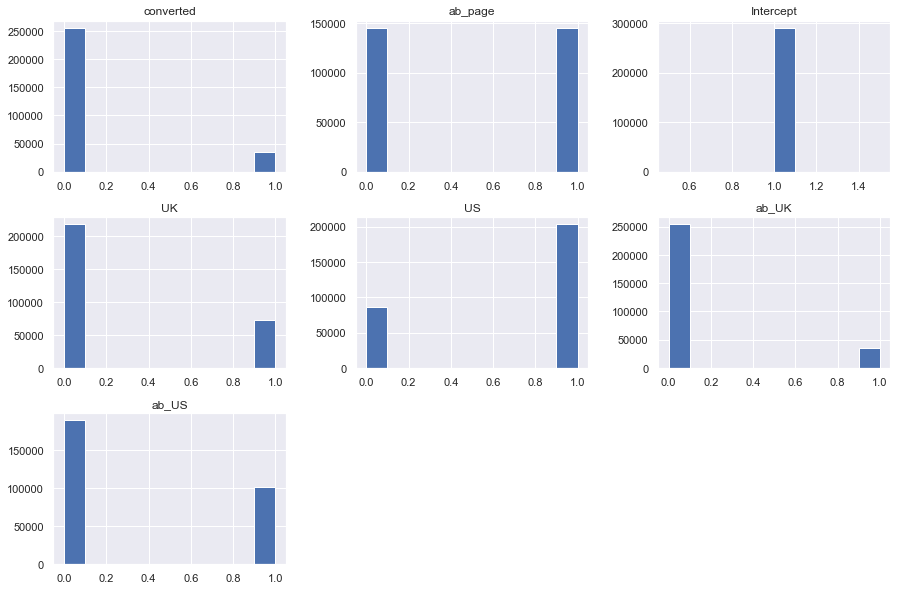

In [70]:
model_df2.hist(figsize=(15,10));

__________________

<a id='conclusions'></a>
## Conclusions

In [71]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 02 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        10:42:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_UK          0.0783      0.057      1.378      0.168      -0.033       0.190
ab_US          0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**<span style="color:green">$$H_o: P_{new} = P_{old}$$
$$H_1: P_{new} \neq P_{old}$$</span>**

**<span style="color:green">As a summary, the above results show that the convesion rate to the old_page is the same as conversion rate to the new page, it also means that there is not sufficient evedince to reject the null hypothesis, and therefore we fail to reject the null hypothesis.</span>**

<span style="color:green">Also from the results, we can find that all p-values of (**ab_page**, **UK**, **US**, **ab_UK**, **ab_US**) are greater than 0.05, and therefore they should run the experiment longer to make their decision.</span>


_______________


### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.